# ML P1 (Bank marketing dataset)

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the given dataset

In [2]:
df=pd.read_csv("C:\\Users\\ARPAN SAHA\\Desktop\BankMarketing.csv")
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Basic EDA

In [3]:
df.shape

(45211, 19)

In [4]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


<AxesSubplot:>

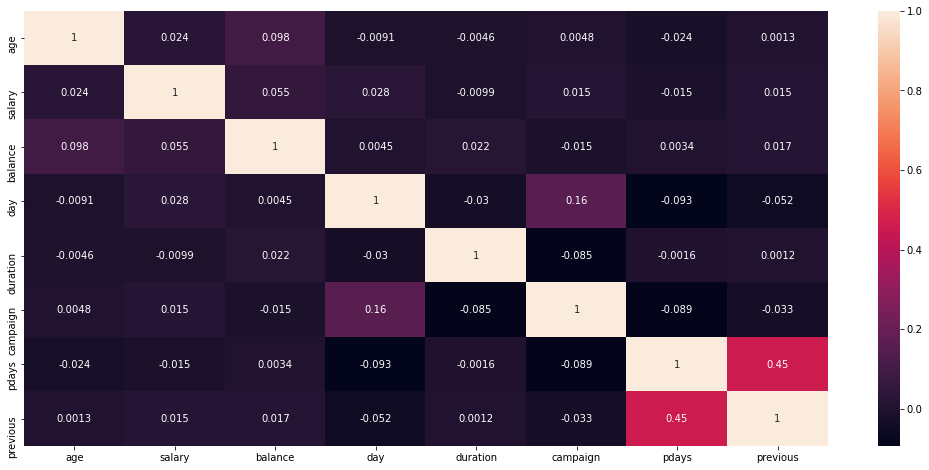

In [6]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True)

In [7]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

pdays has outliers in it as max is way more greater than mean


<AxesSubplot:xlabel='pdays'>

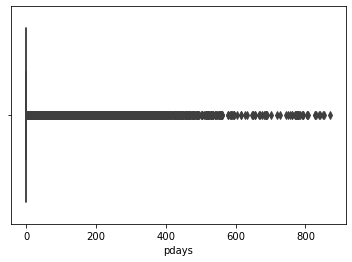

In [8]:
sns.boxplot(df['pdays'])

In [9]:
q1=np.quantile(df['pdays'],0.25)
q2=np.quantile(df['pdays'],0.50)
q3=np.quantile(df['pdays'],0.75)
iqr=q3-q1

In [10]:
uw=q3+(1.5*iqr)
lw=q1-(1.5*iqr)

In [11]:
outliers=[]
for i in df['pdays']:
    if i>uw or i<lw:
        outliers.append(i)

In [12]:
len(outliers)


8257

In [13]:
len(df['pdays'])

45211

In [14]:
round((len(outliers)/len(df['pdays']))*100,2)

18.26

In [15]:
df['pdays']=np.where(df['pdays']>uw,np.nan,df['pdays'])
df['pdays']=np.where(df['pdays']<lw,np.nan,df['pdays'])

In [16]:
 df.dropna(how='any', subset=['pdays'], axis=0, inplace = True)

In [17]:
df['pdays'].describe()

count    36954.0
mean        -1.0
std          0.0
min         -1.0
25%         -1.0
50%         -1.0
75%         -1.0
max         -1.0
Name: pdays, dtype: float64

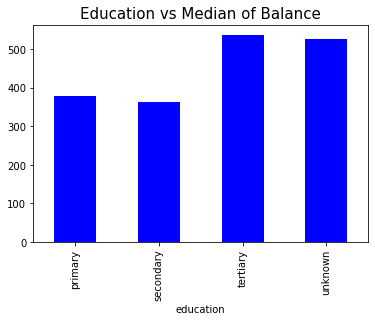

In [18]:
df.groupby(['education'])['balance'].median().plot.bar(color="blue")
plt.title('Education vs Median of Balance',fontsize=15)
plt.show()

We can see that Tertiary has highest median.

# Bivariate Analysis

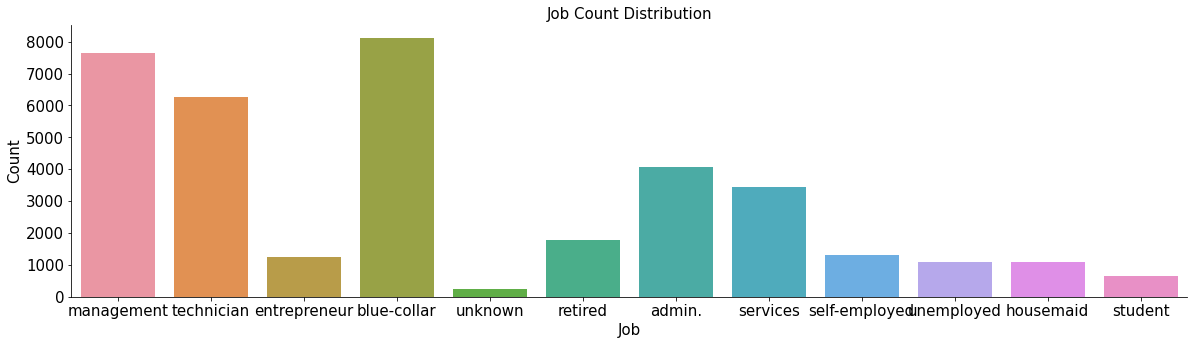

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

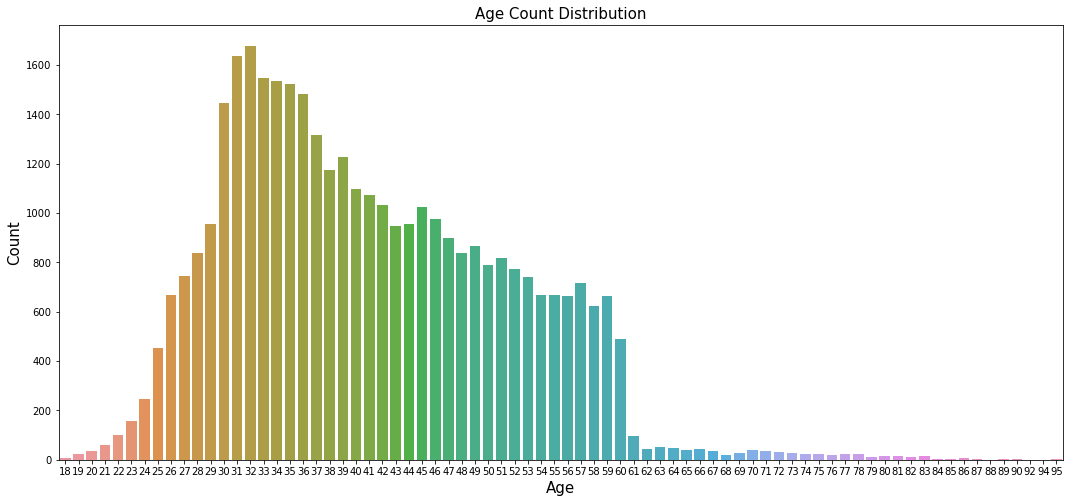

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(x = 'age', data =df)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)
plt.show()

Text(0.5, 1.0, 'Response count distribution')

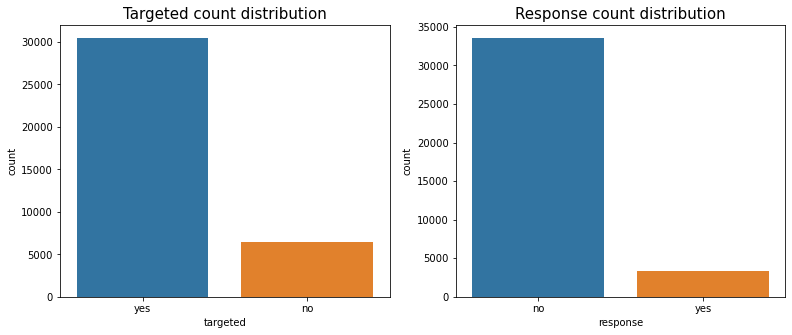

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.countplot(x = 'targeted', data =df,ax=ax1)
ax1.set_title('Targeted count distribution',fontsize=15)


sns.countplot(x = 'response', data =df,ax=ax2)
ax2.set_title('Response count distribution',fontsize=15)


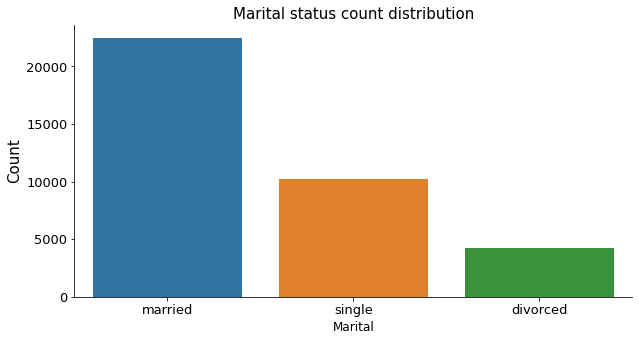

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data =df)
ax.set_xlabel('Marital', fontsize=12)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status count distribution', fontsize=15)
ax.tick_params(labelsize=13)
sns.despine()

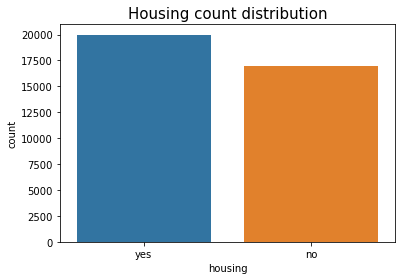

In [23]:
sns.countplot(x = 'housing', data =df)
plt.title('Housing count distribution',fontsize=15)
plt.show()

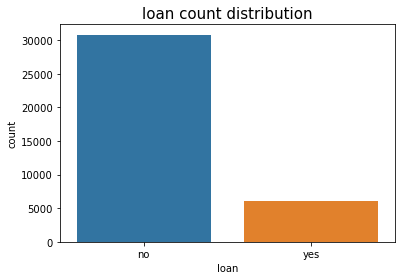

In [24]:
sns.countplot(x = 'loan', data =df)
plt.title('loan count distribution',fontsize=15)
plt.show()

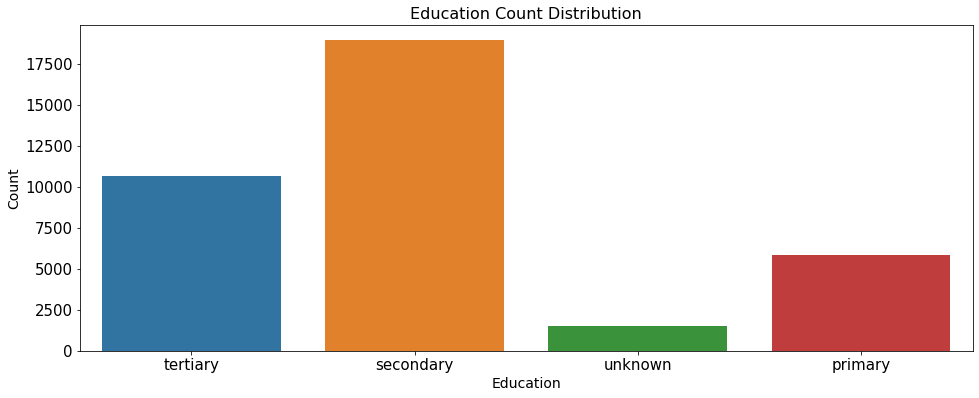

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
sns.countplot(x = 'education', data =df)
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Education Count Distribution', fontsize=16)
ax.tick_params(labelsize=15)

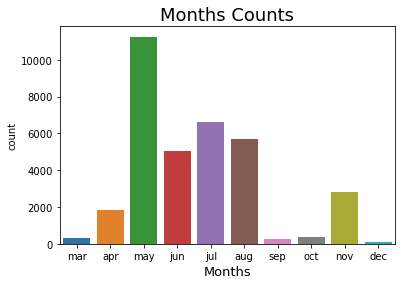

In [26]:
sns.countplot(df['month'], order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.xlabel('Months', fontsize = 13)
plt.ylabel('count')
plt.title('Months Counts',fontsize=18)
plt.show()

# Convertion of categorical values into dummy veriables

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_col=("job","marital","education","targeted","default","housing","loan","contact","month","poutcome","response")
for i in df_col:
    df[i]=le.fit_transform(df[i])
df.head()    

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,4,100000,1,2,1,0,2143,1,0,2,5,8,261,1,-1.0,0,0,0
1,44,9,60000,2,1,1,0,29,1,0,2,5,8,151,1,-1.0,0,0,0
2,33,2,120000,1,1,1,0,2,1,1,2,5,8,76,1,-1.0,0,0,0
3,47,1,20000,1,3,0,0,1506,1,0,2,5,8,92,1,-1.0,0,0,0
4,33,11,0,2,3,0,0,1,0,0,2,5,8,198,1,-1.0,0,0,0


<AxesSubplot:>

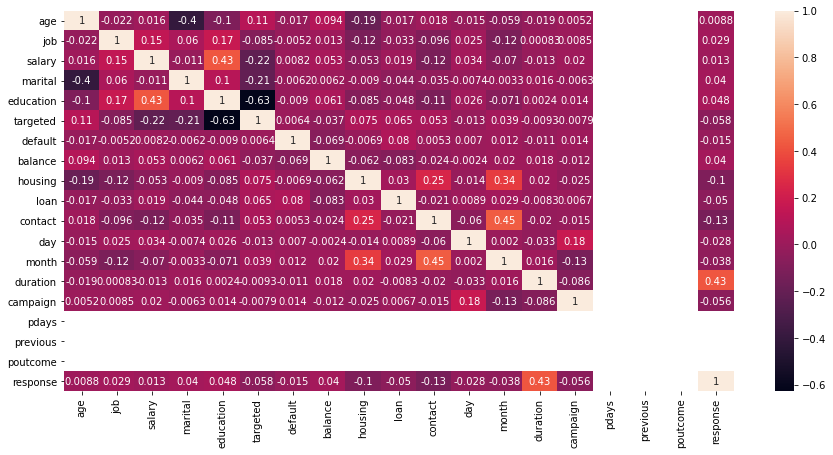

In [28]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

In [30]:
df=df.drop(['pdays','poutcome','previous'],axis=1) #As they are not related to target variable

# Independant and Target variable for Logistic regression

In [31]:
X=df.drop(columns=['response'])
y=df['response']

# Splitting the data into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Scaling the dataset

In [33]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Model building for Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
log_reg = LogisticRegression()
model = log_reg.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.9148259648885431


# Feature selection using RFE

In [36]:
from sklearn.feature_selection import RFE

In [37]:
rfe = RFE(log_reg, 11)            
rfe = rfe.fit(X_train, y_train)

In [38]:
rfe.get_support()

array([ True, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True])

In [39]:
features=X.columns[rfe.get_support()]
features

Index(['age', 'marital', 'education', 'targeted', 'housing', 'loan', 'contact',
       'day', 'month', 'duration', 'campaign'],
      dtype='object')

In [40]:
X_train_rfe=rfe.transform(X_train)
X_test_rfe=rfe.transform(X_test)

In [41]:
model.fit(X_train_rfe, y_train)
print(model.score(X_train_rfe, y_train))

0.9147921388221764


In [42]:
y_pred = model.predict(X_test_rfe)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

# Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA(n_components = 1)
lda = model.fit(X_train_rfe,y_train)

In [44]:
print('Total Variance', round(sum(lda.explained_variance_ratio_)*100,2))

Total Variance 100.0


# K fold Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rfe, X=X_train_rfe, y=y_train, cv=6)

In [46]:
print(all_accuracies)

[0.91477273 0.91637914 0.91516136 0.91292876 0.91292876 0.91597321]


In [47]:
print(all_accuracies.mean())

0.9146906578469904


In [48]:
from sklearn import metrics

# Classification Report

In [49]:
classification_report=metrics.classification_report(y_test,y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6729
           1       0.54      0.21      0.30       662

    accuracy                           0.91      7391
   macro avg       0.73      0.59      0.63      7391
weighted avg       0.89      0.91      0.90      7391



# Random Forest 

In [50]:
x=df.drop(columns=['response'])
y=df['response']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50,random_state=10)
model=rfc.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [53]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=6)

In [54]:
print(all_accuracies)

[0.91984578 0.91698803 0.91800284 0.91556728 0.91536432 0.91516136]


In [55]:
print(all_accuracies.mean())

0.9168216005081112


In [56]:
from sklearn import metrics

# Classification Report

In [57]:
classification_report=metrics.classification_report(y_test,y_pred)

print(classification_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      6729
           1       0.56      0.28      0.37       662

    accuracy                           0.92      7391
   macro avg       0.75      0.63      0.66      7391
weighted avg       0.90      0.92      0.90      7391



# Feature selection using Random forest

In [58]:
feature_imp = pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp.sort_values(ascending=False)

duration     0.337147
balance      0.121502
age          0.115483
day          0.098236
month        0.091577
campaign     0.043323
job          0.040091
salary       0.039017
education    0.025374
contact      0.024466
marital      0.022810
housing      0.017857
loan         0.010981
targeted     0.009752
default      0.002382
dtype: float64

Comparing both the models, Logistic regression and Random forest .....

We can see that Random Forest has performed better as compared to Logistic Regression on the basis of Accurcy metric.

Top features are more or less similar in both the cases.